In [1]:
import os
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f, encoding="latin1")
        return data
    except Exception as e:
        print(f"Erro ao carregar o arquivo {file}: {e}")
        raise

def load_training_data(dataset_path):
    num_files = 5
    num_images_per_file = 10000

    train_images = np.zeros([num_files * num_images_per_file, 3072])
    train_labels = np.zeros([num_files * num_images_per_file])

    for i in range(1, num_files + 1):
        path = os.path.join(dataset_path, f"data_batch_{i}")
        data_dict = unpickle(path)
        start = (i - 1) * num_images_per_file
        end = i * num_images_per_file
        train_images[start:end, :] = data_dict["data"]
        train_labels[start:end] = data_dict["labels"]

    return np.asarray(train_images, dtype=int), np.asarray(train_labels, dtype=int)

def load_test_data(dataset_path):
    path = os.path.join(dataset_path, "test_batch")
    datadict = unpickle(path)
    test_images = datadict["data"]
    test_labels = datadict["labels"]
    return np.asarray(test_images, dtype=int), np.asarray(test_labels, dtype=int)

def visualize(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i * n_cols + j
            axes[i, j].imshow(images[index].reshape(32, 32, 3) / 255.0)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Label: {labels[index]}")
    plt.show()

In [3]:
# Carregamento de dados
dataset_path = "../cifar-10-batches-py"
train_images, train_labels = load_training_data(dataset_path)
test_images, test_labels = load_test_data(dataset_path)

In [4]:
# Divisão dos dados de treinamento
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

In [5]:
# Treinamento do modelo Softmax Regression
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(train_images, train_labels)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [6]:
# Previsões no conjunto de testes
predicted_labels = softmax_model.predict(test_images)

In [7]:
# Avaliação da precisão
accuracy = accuracy_score(test_labels, predicted_labels)
print("Softmax Regression accuracy for CIFAR-10 =", accuracy)

Softmax Regression accuracy for CIFAR-10 = 0.3702


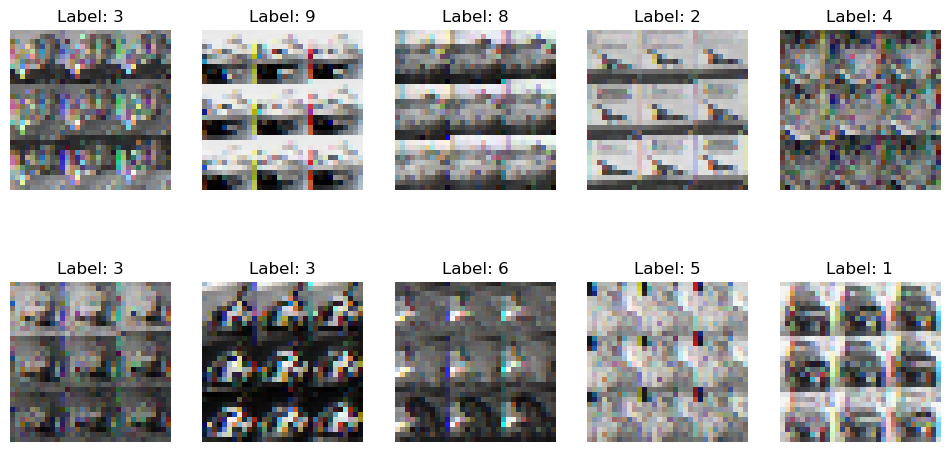

In [8]:
# Visualização de algumas imagens do conjunto de testes
visualize(test_images, predicted_labels)